In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_schools = pd.read_csv("Masterlist of Schools.csv", index_col="school.id")

df_location = pd.read_csv("Schools Location Data.csv", 
                          encoding = "latin-1", 
                          index_col="School ID",
                          usecols=["School ID", "Enrolment", "Latitude", "Longitude"])

df_rooms = pd.read_csv('Rooms data.csv', index_col="School ID")

df_teachers = pd.read_csv("Teachers data.csv", index_col="school.id")

df_elementary = pd.read_csv("Enrollment Master Data_2015_E.csv")[:-1].astype(int).set_index("School ID")

df_secondary = (pd.read_csv('Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
                  .rename(columns = {'SPED NG Male':'SPED NG Male SS', 'SPED NG Female' :'SPED NG Female SS'})
                  .set_index("School ID"))

df_mooe = (pd.read_csv('MOOE data.csv', index_col="school.id", usecols=["school.id", " school.mooe "])
             .replace(",", "", regex=True).astype(float))

In [3]:
df_all = pd.concat([df_schools, df_location, df_rooms, df_teachers, df_elementary, df_secondary, df_mooe], axis=1)
df_all.head()

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,...,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS,school.mooe
100001,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84000.0
100002,Bacarra CES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268000.0
100003,Buyon ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0
100004,Ganagan ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116000.0
100005,Macupit ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115000.0


In [4]:
df_secondary = (pd.read_csv('Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
                  .rename(columns = {'SPED NG Male':'SPED NG Male SS', 'SPED NG Female' :'SPED NG Female SS'})
                  .set_index("School ID"))

df_secondary

,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS
School ID,,,,,,,,,,,,,,
300001,20,12,13,17,10,15,17,14,0,0,0,0,0,0
300002,240,288,229,258,225,231,261,207,0,0,0,0,0,0
300003,89,84,78,88,65,76,54,79,0,0,0,0,0,0
300004,38,47,47,54,39,42,52,45,0,0,0,0,0,0
300005,78,70,60,61,68,64,53,50,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320607,49,39,46,44,48,46,42,50,0,0,0,0,0,0
320701,406,368,367,354,351,333,298,328,0,0,0,0,0,0
320702,252,245,215,202,164,185,140,126,0,0,0,0,0,0


In [5]:
df_all.isna().sum()

school.name             148
school.region           148
school.region.name      148
school.province         148
school.cityhall         149
                      ...  
Grade 12 Male         38775
Grade 12 Female       38775
SPED NG Male SS       38775
SPED NG Female SS     38775
 school.mooe           2723
Length: 64, dtype: int64

In [6]:
df_all[df_all.index.duplicated(keep=False)]

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,...,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS,school.mooe


In [7]:
df_all.columns

Index(['school.name', 'school.region', 'school.region.name', 'school.province',
       'school.cityhall', 'school.division', 'school.citymuni',
       'school.district', 'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'Enrolment', 'Latitude',
       'Longitude', 'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped', 'Kinder Male', 'Kinder Female', 'Grade 1 Male',
       'Grade 1 Female', 'Grade 2 Male', 'Grade 2 Female', 'Grade 3 Male',
       'Grade 3 Female', 'Grade 4 Male', 'Grade 4 Female', 'Grade 5 Male',
       'Grade 5 Female', 'Grade 6 Male', 'Grade 6 Femal

In [8]:
df_all['Total Elementary SPED Students'] = df_all['SPED NG Male'] + df_all['SPED NG Female']
df_all['Total Secondary SPED Students'] = df_all['SPED NG Male SS'] + df_all['SPED NG Female SS']
df_all['Total Used Rooms'] = (df_all['rooms.standard.academic'] + df_all['rooms.nonstandard.academic'])
                             
df_all['Total Unused Rooms'] = (df_all['rooms.standard.unused'] + df_all['rooms.nonstandard.unused'])
df_all['Other Teachers'] = (df_all['teachers.instructor'] + 
                             df_all['teachers.mobile'] + 
                             df_all['teachers.regular'])
                            
df_all['SPED Teachers'] = df_all['teachers.sped']

In [9]:
df_all['Total Elementary Students'] = df_all['Total Elementary SPED Students'] + df_all['Kinder Male'] + df_all['Kinder Female']+ df_all['Grade 1 Female'] + df_all['Grade 1 Male'] + df_all['Grade 2 Male']+ df_all['Grade 2 Female']+df_all['Grade 3 Male']+ df_all['Grade 3 Female']+df_all['Grade 4 Male']+ df_all['Grade 4 Female']+df_all['Grade 5 Male']+ df_all['Grade 5 Female']+df_all['Grade 6 Male']+ df_all['Grade 6 Female']
df_all['Total Secondary Students'] = df_all['Total Secondary SPED Students'] + df_all['Grade 7 Male']+df_all['Grade 7 Female']+df_all['Grade 8 Male']+df_all['Grade 8 Female']+df_all['Grade 9 Male']+df_all['Grade 9 Female']+df_all['Grade 10 Male']+df_all['Grade 10 Female']+df_all['Grade 11 Male']+df_all['Grade 11 Female']+df_all['Grade 12 Male']+df_all['Grade 12 Female']
df_all['Total Teachers'] = df_all['teachers.instructor']+df_all['teachers.mobile']+df_all['teachers.mobile']+df_all['teachers.regular']+df_all['teachers.sped']

In [10]:
df_all.isna().sum()

school.name                    148
school.region                  148
school.region.name             148
school.province                148
school.cityhall                149
                             ...  
Other Teachers                1711
SPED Teachers                 1711
Total Elementary Students     8103
Total Secondary Students     38775
Total Teachers                1711
Length: 73, dtype: int64

In [11]:
df_eda = df_all[['school.region','school.classification','school.classification2','school.type','school.urban','Total Elementary Students','Total Secondary Students','Total Used Rooms', 'Total Unused Rooms','Total Teachers',' school.mooe ']].reset_index()
df_eda.head()

,index,school.region,school.classification,school.classification2,school.type,school.urban,Total Elementary Students,Total Secondary Students,Total Used Rooms,Total Unused Rooms,Total Teachers,school.mooe
0,100001,Region I,Elementary,DepED Managed,School with no Annexes,Partially Urban,90.0,NaN,2.0,0.0,2.0,84000.0
1,100002,Region I,Elementary,DepED Managed,School with no Annexes,Partially Urban,456.0,NaN,12.0,0.0,23.0,268000.0
2,100003,Region I,Elementary,DepED Managed,School with no Annexes,Partially Urban,167.0,NaN,6.0,0.0,8.0,135000.0
3,100004,Region I,Elementary,DepED Managed,School with no Annexes,Partially Urban,122.0,NaN,6.0,0.0,8.0,116000.0
4,100005,Region I,Elementary,DepED Managed,School with no Annexes,Partially Urban,77.0,NaN,6.0,0.0,8.0,115000.0


In [12]:
df_all.isna().sum()

school.name                    148
school.region                  148
school.region.name             148
school.province                148
school.cityhall                149
                             ...  
Other Teachers                1711
SPED Teachers                 1711
Total Elementary Students     8103
Total Secondary Students     38775
Total Teachers                1711
Length: 73, dtype: int64

In [13]:
### Elementary Data for EDA

df_elementary_final = df_eda[df_eda['school.classification'] == 'Elementary']
df_elementary_final =  df_elementary_final[['school.region','school.classification','school.classification2','school.type','school.urban','Total Elementary Students','Total Used Rooms', 'Total Unused Rooms','Total Teachers',' school.mooe ']]
df_elementary_final['ST ratio'] = df_elementary_final['Total Elementary Students'] / df_elementary_final['Total Teachers']
df_elementary_final['Budget per Student'] = df_elementary_final[' school.mooe '] / df_elementary_final['Total Elementary Students']
df_elementary_final['Students per Room'] = df_elementary_final['Total Elementary Students'] / df_elementary_final['Total Used Rooms']
df_elementary_final = df_elementary_final[df_elementary_final[' school.mooe '] != 0]
df_elementary_final = df_elementary_final[df_elementary_final['Total Teachers'] != 0]
df_elementary_final = df_elementary_final[df_elementary_final['Total Elementary Students'] != 0]
df_elementary_final = df_elementary_final[df_elementary_final['Total Used Rooms'] != 0]
df_elementary_final = df_elementary_final[df_elementary_final['ST ratio'] != 0]


## By Region
df_elementary_grouped = df_elementary_final.groupby(['school.region'])['Total Elementary Students','Students per Room','Total Teachers','Budget per Student'].mean().reset_index()
df_elementary_grouped['ST ratio_elementary'] = df_elementary_grouped['Total Elementary Students'] / df_elementary_grouped['Total Teachers']
df_elementary_grouped.head()

,school.region,Total Elementary Students,Students per Room,Total Teachers,Budget per Student,ST ratio_elementary
0,ARMM,314.936864,62.264032,7.581442,NaN,41.540495
1,CAR,163.294829,30.790363,6.224377,1308.537647,26.234728
2,CARAGA,286.952824,43.926866,8.140460,813.458198,35.250198
3,NCR,2660.930097,92.981751,73.730061,431.268730,36.090165
4,Region I,303.748325,34.795202,10.286075,800.086144,29.530052


In [14]:
### Elementary Data for EDA

df_secondary_final = df_eda[df_eda['school.classification'] == 'Secondary']
df_secondary_final =  df_secondary_final[['school.region','school.classification','school.classification2','school.type','school.urban','Total Secondary Students','Total Used Rooms', 'Total Unused Rooms','Total Teachers',' school.mooe ']]
df_secondary_final['ST ratio'] = df_secondary_final['Total Secondary Students'] / df_secondary_final['Total Teachers']
df_secondary_final['Budget per Student'] = df_secondary_final[' school.mooe '] / df_secondary_final['Total Secondary Students']
df_secondary_final['Students per Room'] = df_secondary_final['Total Secondary Students'] / df_secondary_final['Total Used Rooms']
df_secondary_final = df_secondary_final[df_secondary_final[' school.mooe '] != 0]
df_secondary_final = df_secondary_final[df_secondary_final['Total Teachers'] != 0]
df_secondary_final = df_secondary_final[df_secondary_final['Total Secondary Students'] != 0]
df_secondary_final = df_secondary_final[df_secondary_final['Total Used Rooms'] != 0]
df_secondary_final = df_secondary_final[df_secondary_final['ST ratio'] != 0]


## By Region
df_secondary_grouped = df_secondary_final.groupby(['school.region'])['Total Secondary Students','Students per Room','Total Teachers','Budget per Student'].mean().reset_index()
df_secondary_grouped['ST ratio_secondary'] = df_secondary_grouped['Total Secondary Students'] / df_secondary_grouped['Total Teachers']
df_secondary_grouped.head()

,school.region,Total Secondary Students,Students per Room,Total Teachers,Budget per Student,ST ratio_secondary
0,ARMM,507.772563,70.491087,15.031746,NaN,33.780012
1,CAR,331.752809,45.417265,17.102804,1544.703622,19.397569
2,CARAGA,486.823353,54.366230,21.640316,1273.261162,22.496129
3,NCR,2787.473251,96.695457,111.250000,1362.507653,25.055939
4,Region I,611.700787,49.292699,22.750515,1331.820757,26.887337


## DISTRIBUTIONS FOR ELEMENTARY

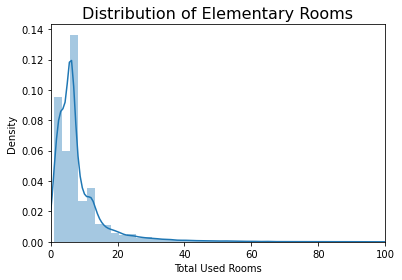

In [15]:
# Rooms Distribution

scale_factor = 100
xmin, xmax = plt.xlim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)

sns.distplot(df_elementary_final['Total Used Rooms'], hist=True)
plt.title("Distribution of Elementary Rooms", fontsize=16)

plt.show()

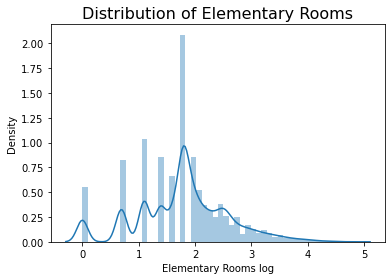

In [17]:
## Elementary Rooms Log

df_elementary_final['Elementary Rooms log'] = np.log(df_elementary_final['Total Used Rooms'])
df_elementary_final['Elementary Rooms log'] = df_elementary_final['Elementary Rooms log'].replace([np.inf, -np.inf], np.nan)

sns.distplot(df_elementary_final['Elementary Rooms log'], hist=True)
plt.title("Distribution of Elementary Rooms", fontsize=16)

plt.show()

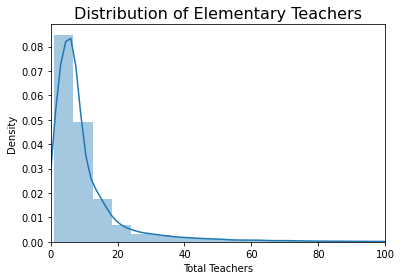

In [18]:
# Teachers Distribution

scale_factor = 100
xmin, xmax = plt.xlim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)

sns.distplot(df_elementary_final['Total Teachers'], hist=True)
plt.title("Distribution of Elementary Teachers", fontsize=16)

plt.show()

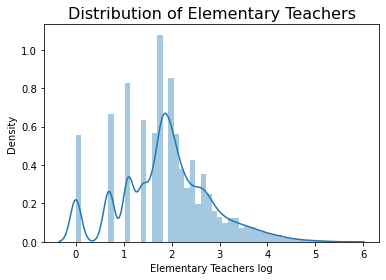

In [20]:
## Elementary Teachers Log
df_elementary_final['Elementary Teachers log'] = np.log(df_elementary_final['Total Teachers'])
df_elementary_final['Elementary Teachers log'] = df_elementary_final['Elementary Teachers log'].replace([np.inf, -np.inf], np.nan)

sns.distplot(df_elementary_final['Elementary Teachers log'], hist=True)
plt.title("Distribution of Elementary Teachers", fontsize=16)

plt.show()

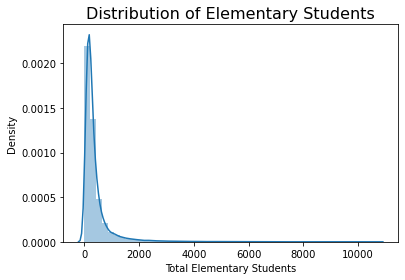

In [21]:
# Students Distribution


sns.distplot(df_elementary_final['Total Elementary Students'], hist=True)
plt.title("Distribution of Elementary Students", fontsize=16)

plt.show()

In [23]:
## Elementary Students (log)

df_elementary_final['Elementary Students log'] = np.log(df_elementary_final['Total Elementary Students'])
df_elementary_final['Students log'] = df_elementary_final['Students log'].replace([np.inf, -np.inf], np.nan)

sns.distplot(df_elementary_final['Elementary Students log'], hist=True)
plt.title("Distribution of Elementary Students", fontsize=16)

plt.show()



KeyError: 'Students log'

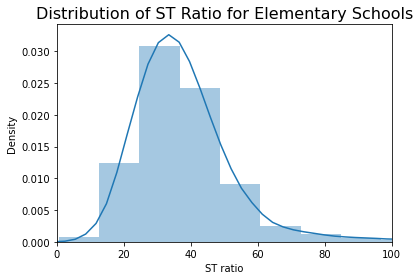

In [66]:
## ST Ratio distribution
df_elem = df_elementary_final.replace([np.inf, -np.inf], np.nan)

scale_factor = 100
xmin, xmax = plt.xlim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)

sns.distplot(df_elem['ST ratio'], hist=True)
plt.title("Distribution of ST Ratio for Elementary Schools", fontsize=16)


plt.show()

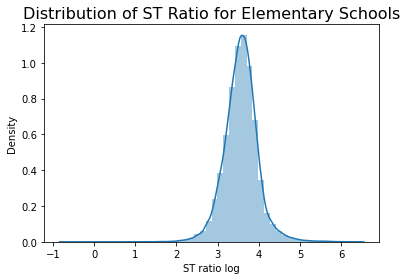

In [77]:
## ST Ratio distribution (log)
df_elementary_final['ST ratio log'] = np.log(df_elementary_final['ST ratio'])
df_elem['ST ratio log'] = df_elementary_final['ST ratio log'].replace([np.inf, -np.inf], np.nan)


sns.distplot(df_elem['ST ratio log'], hist=True)
plt.title("Distribution of ST Ratio for Elementary Schools", fontsize=16)


plt.show()

### DISTRIBUTIONS FOR SECONDARY

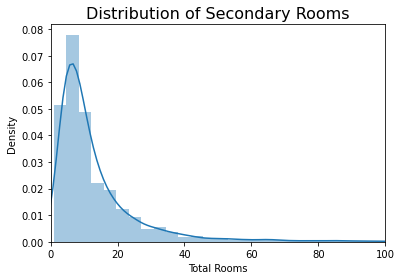

In [58]:
# Rooms Distribution

scale_factor = 100
xmin, xmax = plt.xlim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)

sns.distplot(df_secondary_final['Total Rooms'], hist=True)
plt.title("Distribution of Secondary Rooms", fontsize=16)

plt.show()

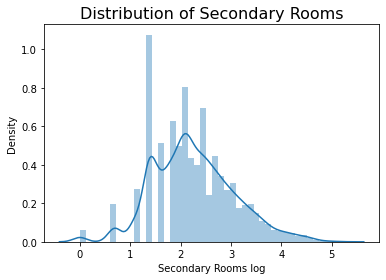

In [84]:
## Secondary Rooms Log

df_secondary_final['Secondary Rooms log'] = np.log(df_secondary_final['Total Rooms'])
df_elem['Secondary Rooms log'] = df_secondary_final['Secondary Rooms log'].replace([np.inf, -np.inf], np.nan)

sns.distplot(df_secondary_final['Secondary Rooms log'], hist=True)
plt.title("Distribution of Secondary Rooms", fontsize=16)

plt.show()

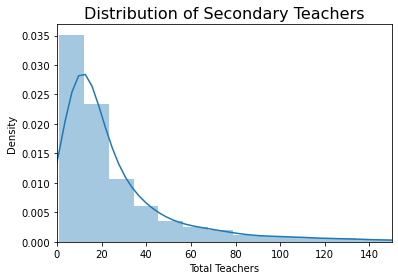

In [59]:
# Teachers Distribution

scale_factor = 150
xmin, xmax = plt.xlim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)

sns.distplot(df_secondary_final['Total Teachers'], hist=True)
plt.title("Distribution of Secondary Teachers", fontsize=16)

plt.show()

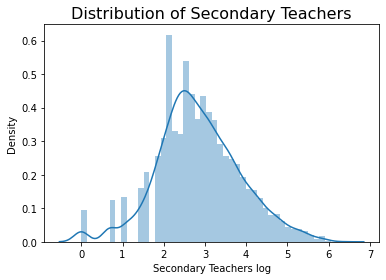

In [85]:
## Secondary Teachers Log
df_secondary_final['Secondary Teachers log'] = np.log(df_secondary_final['Total Teachers'])
df_elem['Secondary Teachers log'] = df_secondary_final['Secondary Teachers log'].replace([np.inf, -np.inf], np.nan)

sns.distplot(df_secondary_final['Secondary Teachers log'], hist=True)
plt.title("Distribution of Secondary Teachers", fontsize=16)

plt.show()

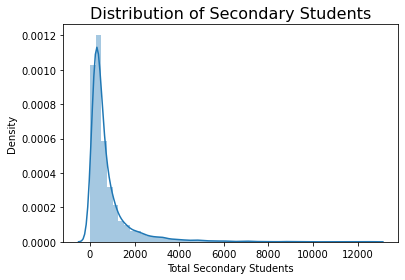

In [60]:
# Students Distribution


sns.distplot(df_secondary_final['Total Secondary Students'], hist=True)
plt.title("Distribution of Secondary Students", fontsize=16)

plt.show()

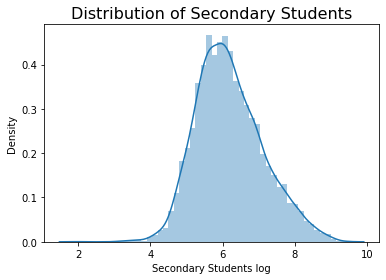

In [89]:
## Secondary Students (log)

df_secondary_final['Secondary Students log'] = np.log(df_secondary_final['Total Secondary Students'])
df_elem['Secondary Students log'] = df_secondary_final['Secondary Students log'].replace([np.inf, -np.inf], np.nan)

sns.distplot(df_secondary_final['Secondary Students log'], hist=True)
plt.title("Distribution of Secondary Students", fontsize=16)

plt.show()



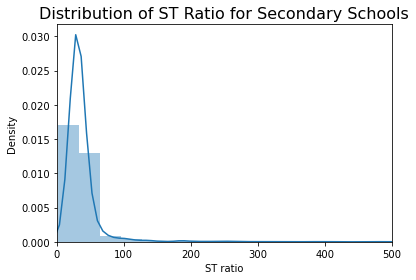

In [76]:
## ST Ratio distribution
df_hs = df_secondary_final.replace([np.inf, -np.inf], np.nan)

scale_factor = 500
xmin, xmax = plt.xlim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)

sns.distplot(df_hs['ST ratio'], hist=True)
plt.title("Distribution of ST Ratio for Secondary Schools", fontsize=16)


plt.show()

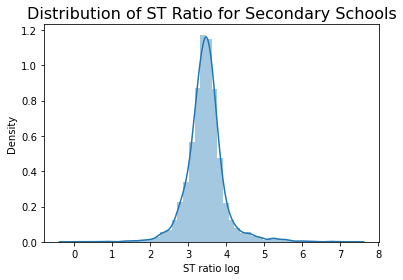

In [90]:
## ST Ratio distribution (log)
df_secondary_final['ST ratio log'] = np.log(df_secondary_final['ST ratio'])
df_elem['ST ratio log'] = df_secondary_final['ST ratio log'].replace([np.inf, -np.inf], np.nan)


sns.distplot(df_elem['ST ratio log'], hist=True)
plt.title("Distribution of ST Ratio for Secondary Schools", fontsize=16)


plt.show()

### Regional Total

**USED ROOMS**

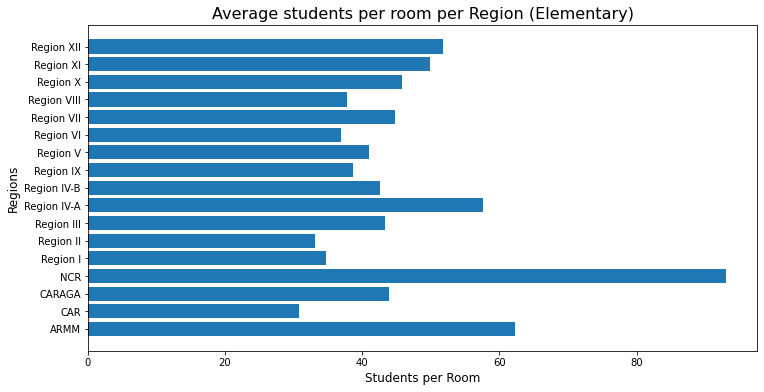

In [24]:
## Regions with Most Number of Used Rooms for Elementary

# indicates if plotting on the figues or on subplots
plt.figure(figsize=(12,6)) ## size of the figure

# the main code to create the graph
plt.barh(df_elementary_grouped['school.region'], df_elementary_grouped['Students per Room']) # plt.bar(x-axis, y-axis)

# additional elements that can be customzed
plt.title("Average students per room per Region (Elementary)", fontsize=16)
plt.ylabel("Regions", fontsize=12)
plt.xlabel("Students per Room", fontsize=12)

# display graph
plt.show()

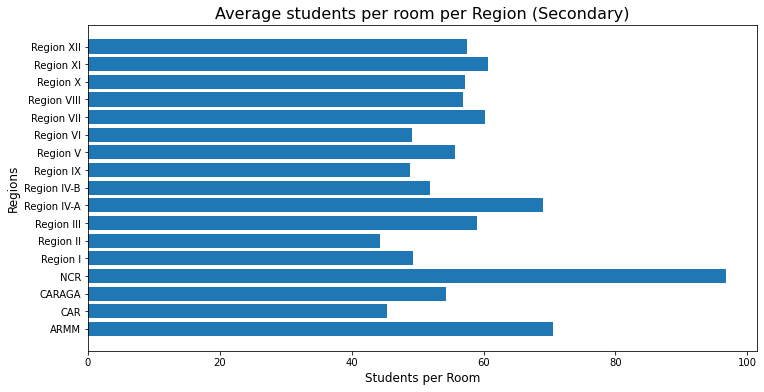

In [25]:
## Regions with Most Number of Used Rooms for Secondary

# indicates if plotting on the figues or on subplots
plt.figure(figsize=(12,6)) ## size of the figure

# the main code to create the graph
plt.barh(df_secondary_grouped['school.region'], df_secondary_grouped['Students per Room']) # plt.bar(x-axis, y-axis)

# additional elements that can be customzed
plt.title("Average students per room per Region (Secondary)", fontsize=16)
plt.ylabel("Regions", fontsize=12)
plt.xlabel("Students per Room", fontsize=12)

# display graph
plt.show()

**MOOE**

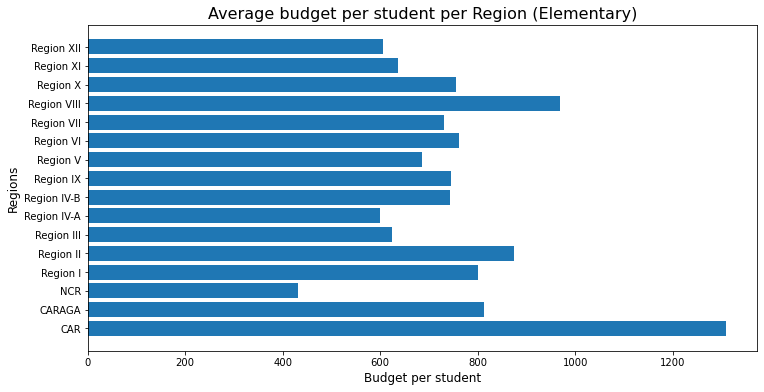

In [26]:
## Removed ARMM - no data
## MOOE per Region for Elementary level
df_noARMM = df_elementary_grouped[df_elementary_grouped['school.region'] != 'ARMM']
# indicates if plotting on the figues or on subplots
plt.figure(figsize=(12,6)) ## size of the figure

# the main code to create the graph
plt.barh(df_noARMM['school.region'], df_noARMM['Budget per Student']) # plt.bar(x-axis, y-axis)

# additional elements that can be customzed
plt.title("Average budget per student per Region (Elementary)", fontsize=16)
plt.ylabel("Regions", fontsize=12)
plt.xlabel("Budget per student", fontsize=12)

# display graph
plt.show()

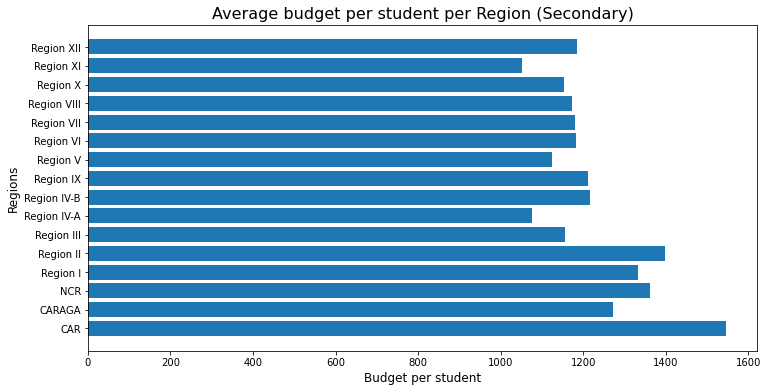

In [27]:
## Removed ARMM - no data
## MOOE per Region for secondary level
df_noARMM = df_secondary_grouped[df_secondary_grouped['school.region'] != 'ARMM']
# indicates if plotting on the figues or on subplots
plt.figure(figsize=(12,6)) ## size of the figure

# the main code to create the graph
plt.barh(df_noARMM['school.region'], df_noARMM['Budget per Student']) # plt.bar(x-axis, y-axis)

# additional elements that can be customzed
plt.title("Average budget per student per Region (Secondary)", fontsize=16)
plt.ylabel("Regions", fontsize=12)
plt.xlabel("Budget per student", fontsize=12)

# display graph
plt.show()

**ST RATIO**

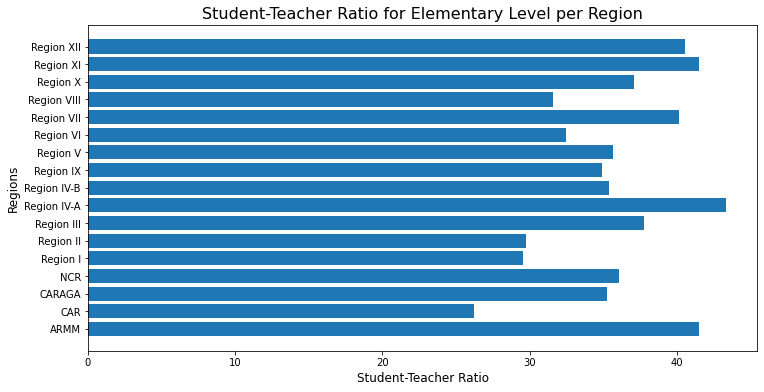

In [28]:
## ST ratio for Elementary Schools per Region

# indicates if plotting on the figues or on subplots
plt.figure(figsize=(12,6)) ## size of the figure

# the main code to create the graph
plt.barh(df_elementary_grouped['school.region'], df_elementary_grouped['ST ratio_elementary']) # plt.bar(x-axis, y-axis)

# additional elements that can be customzed
plt.title("Student-Teacher Ratio for Elementary Level per Region", fontsize=16)
plt.ylabel("Regions", fontsize=12)
plt.xlabel("Student-Teacher Ratio", fontsize=12)

# display graph
plt.show()

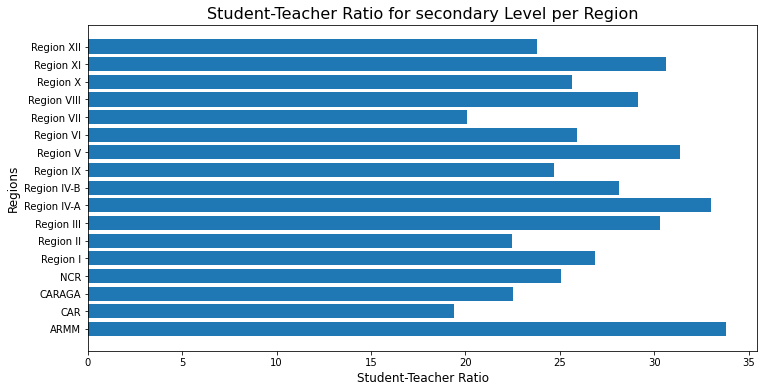

In [29]:
## ST ratio for secondary Schools per Region

# indicates if plotting on the figues or on subplots
plt.figure(figsize=(12,6)) ## size of the figure

# the main code to create the graph
plt.barh(df_secondary_grouped['school.region'], df_secondary_grouped['ST ratio_secondary']) # plt.bar(x-axis, y-axis)

# additional elements that can be customzed
plt.title("Student-Teacher Ratio for secondary Level per Region", fontsize=16)
plt.ylabel("Regions", fontsize=12)
plt.xlabel("Student-Teacher Ratio", fontsize=12)

# display graph
plt.show()

### RELATIONSHIPS

Rooms x ST Ratio

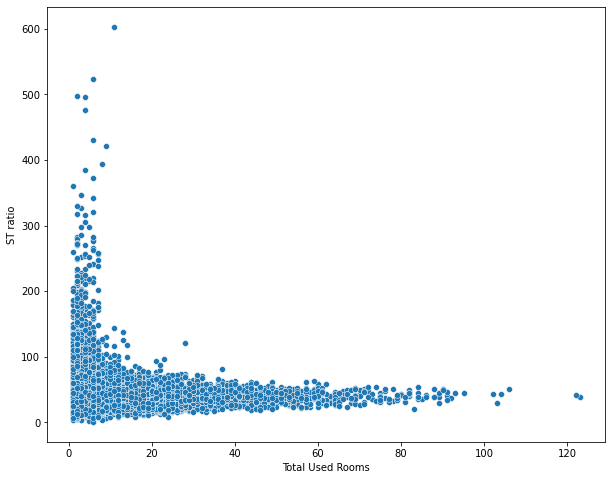

In [30]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=df_elementary_final, x='Total Used Rooms', y='ST ratio')

plt.show()

In [31]:
df_elementary_grouped.columns

Index(['school.region', 'Total Elementary Students', 'Students per Room',
       'Total Teachers', 'Budget per Student', 'ST ratio_elementary'],
      dtype='object')

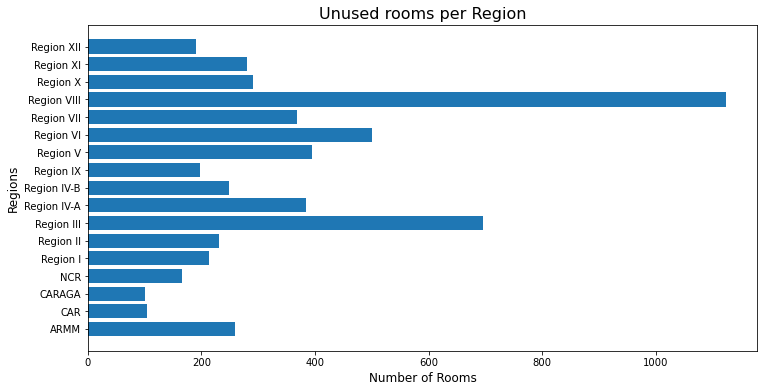

In [111]:
## Regions with Most Number of Used Rooms

# indicates if plotting on the figues or on subplots
plt.figure(figsize=(12,6)) ## size of the figure

# the main code to create the graph
plt.barh(df_elementary_grouped['school.region'], df_elementary_grouped['Total Unused Rooms']) # plt.bar(x-axis, y-axis)

# additional elements that can be customzed
plt.title("Unused rooms per Region", fontsize=16)
plt.ylabel("Regions", fontsize=12)
plt.xlabel("Number of Rooms", fontsize=12)

# display graph
plt.show()